In [1]:
import pandas as pd
import numpy as np
import os

data_folder = '/home/wenceslai/Documents/titanic_kaggle'
data = pd.read_csv(os.path.join(data_folder, 'train.csv'))
data = data.fillna(data.mean()) #better to do it in val and train sets differently
                                #it leaks information like this
#data = data.dropna(axis=0)
#data.head()

In [2]:
data = data.drop(['Name', 'Embarked', 'SibSp', 'Ticket', 'Cabin', 'Parch'], axis=1)

In [3]:
data = data.to_numpy()
targets = np.empty(shape=(len(data), 1))
surv_i = 1
sex_i = 3
for i in range(len(data)):
    targets[i] = data[i, surv_i]
    if data[i, sex_i] == 'male': data[i, sex_i] = 1
    elif data[i, sex_i] == 'female': data[i, sex_i] = 0

inputs = np.delete(data, 1, 1)
inputs = np.delete(inputs, 0, 1)

inputs = inputs.astype('float32')

In [4]:
val_set_len = 100
train_set_len = len(inputs) - val_set_len

x_train = inputs[:train_set_len]
y_train = targets[:train_set_len]

x_val = inputs[train_set_len:]
y_val = targets[train_set_len:]

print("training: ", x_train.shape, y_train.shape, "validation: ", x_val.shape, y_val.shape)

training:  (791, 4) (791, 1) validation:  (100, 4) (100, 1)


In [5]:
x_train -= x_train.mean(axis=0)
x_train /= x_train.std(axis=0)

x_val -= x_val.mean(axis=0)
x_val /= x_val.std(axis=0)

In [6]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(x_train.shape[1], )))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

Using TensorFlow backend.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [7]:
num_of_epochs = 50
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=num_of_epochs,
                    validation_data=(x_val, y_val),
                    verbose=2)




Train on 791 samples, validate on 100 samples
Epoch 1/50





 - 1s - loss: 0.6828 - acc: 0.5234 - val_loss: 0.6233 - val_acc: 0.6800
Epoch 2/50
 - 0s - loss: 0.6066 - acc: 0.7838 - val_loss: 0.5675 - val_acc: 0.7900
Epoch 3/50
 - 0s - loss: 0.5599 - acc: 0.7927 - val_loss: 0.5292 - val_acc: 0.7900
Epoch 4/50
 - 0s - loss: 0.5271 - acc: 0.7965 - val_loss: 0.4956 - val_acc: 0.7900
Epoch 5/50
 - 0s - loss: 0.5007 - acc: 0.7914 - val_loss: 0.4750 - val_acc: 0.7800
Epoch 6/50
 - 0s - loss: 0.4824 - acc: 0.7939 - val_loss: 0.4588 - val_acc: 0.7800
Epoch 7/50
 - 0s - loss: 0.4675 - acc: 0.7965 - val_loss: 0.4439 - val_acc: 0.7800
Epoch 8/50
 - 0s - loss: 0.4576 - acc: 0.7927 - val_loss: 0.4363 - val_acc: 0.7800
Epoch 9/50
 - 0s - loss: 0.4506 - acc: 0.7952 - val_loss: 0.4309 - val_acc: 0.7800
Epoch 10/50
 - 0s - loss: 0.4474 - acc: 0.8003 - val_loss: 0.4290 - val_acc: 0.7800
Epoch 11/50
 - 0s - loss: 0.4445 - acc: 0.7977 - val_loss: 0.4249 - val_acc: 0.7800
Epoch 12/50
 - 0s - loss: 0.442

In [8]:
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


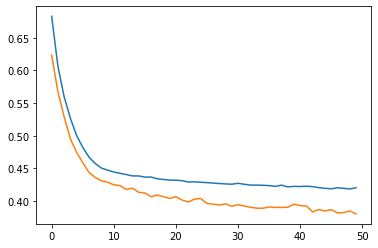

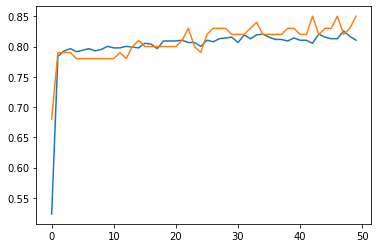

In [9]:
loss = history.history['loss']
accuracy = history.history['acc']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_acc']

import matplotlib.pyplot as plt

plt.plot(range(num_of_epochs), loss, label="loss")
plt.plot(range(num_of_epochs), val_loss, label="val_loss")
plt.figure()
plt.plot(range(num_of_epochs), accuracy)
plt.plot(range(num_of_epochs), val_accuracy)
plt.show()

In [10]:
test_data = pd.read_csv(os.path.join(data_folder, 'test.csv'))
test_data = test_data.fillna(test_data.mean())
test_data = test_data.drop(['Name', 'Embarked', 'SibSp', 'Ticket', 'Cabin', 'Parch'], axis=1)

x_test = test_data.to_numpy()
x_test = np.delete(x_test, 0, 1)

for i in range(len(x_test)):
    if x_test[i, 1] == 'male': x_test[i, 1] = 1
    elif x_test[i, 1] == 'female': x_test[i, 1] = 0

x_test = x_test.astype('float32')
x_test -= x_test.mean(axis=0)
x_test /= x_test.std(axis=0)

submission = np.empty(shape=(len(x_test), 2))
pass_index = 892
y = model.predict(x_test)
y = np.round(y)

for i in range(len(x_test)):
    submission[i, 1] = y[i]
    submission[i, 0] = pass_index
    pass_index += 1

submission = submission.astype(int)
submission_final = pd.DataFrame({'PassengerId' : submission[:, 0], 'Survived' : submission[:, 1]})
submission_final.to_csv(os.path.join(data_folder, 'submission_out4.csv'), index=False)

